# Analyze transcript field to find most common messey chars
### Code written w/ claude before motified

In [1]:
# Messy Character Tracker for Excel Files
# This notebook analyzes the 'Transcript' field to identify sequences of messy characters

import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from utils.constants import Paths
from utils.ocr_cleaning import OCR_Check

In [3]:
# Load excel file (modified metadata from 00 notebook)

file_path = Paths.mccray_modified_metadata
df = pd.read_excel(file_path)

print(f"Loaded {len(df)} rows")
print(f"Columns: {list(df.columns)}")

# Check if Transcript column exists
transcript_col = 'Transcript'
if transcript_col not in df.columns:
    print(f"Column '{transcript_col}' not found. Available columns: {list(df.columns)}")

Loaded 19329 rows
Columns: ['Title', 'Creator', 'Contributors', 'Date', 'Approximate Date', 'Source', 'Subject', 'Local Subject', 'S.C. County', 'Description', 'Extent', 'Digital Collection', 'Website', 'Contributing Institution', 'Rights', 'Time Period', 'Geographic Location', 'Language', 'Digitization Specifications', 'Date Digital', 'Type', 'Format', 'Media Type', 'Identifier', 'Note', 'Digital Assistant', 'Transcript', 'OCLC number', 'Date created', 'Date modified', 'Reference URL', 'CONTENTdm number', 'CONTENTdm file name', 'CONTENTdm file path', 'Year', 'messy_sequences', 'messy_count', 'has_messy', 'total_messy_chars']


In [4]:
# Find messy character sequences (2+ consecutive non-alphanumeric, non-standard punctuation)
def find_messy_sequences(text):
    if pd.isna(text) or not isinstance(text, str):
        return []
    
    # Pattern for messy chars: anything that's not letter, number, space, or standard punctuation
    messy_pattern = r'[^a-zA-Z0-9\s.,!?;:\'"()\-_/\\@#$%^&*+=<>{}[\]|`~]{2,}'
    return re.findall(messy_pattern, text)

# Apply analysis
df['messy_sequences'] = df[transcript_col].apply(find_messy_sequences)
df['messy_count'] = df['messy_sequences'].apply(len)
df['has_messy'] = df['messy_count'] > 0
df['total_messy_chars'] = df['messy_sequences'].apply(lambda x: sum(len(seq) for seq in x))

# New step, messy score is defined more strictly (may use more strict char sequences on messy sequences as well later)
df['messy_score'] = df[transcript_col].apply(OCR_Check.is_messy_score)

TypeError: expected string or bytes-like object, got 'float'

In [4]:
# Summary stats
total_rows = len(df)
messy_rows = df['has_messy'].sum()
print(f"\nSummary:")
print(f"Total rows: {total_rows}")
print(f"Rows with messy chars: {messy_rows} ({messy_rows/total_rows*100:.1f}%)")
print(f"Total messy sequences: {df['messy_count'].sum()}")


Summary:
Total rows: 19329
Rows with messy chars: 10835 (56.1%)
Total messy sequences: 144563


In [5]:
# Show most common messy sequences
all_sequences = []
for sequences in df['messy_sequences']:
    all_sequences.extend(sequences)

if all_sequences:
    sequence_counts = Counter(all_sequences)
    print(f"\nTop 50 messy sequences:")
    for seq, count in sequence_counts.most_common(50):
        print(f"  {repr(seq)}: {count} times")



Top 50 messy sequences:
  'ΓÇÖ': 21983 times
  '┬⌐': 15338 times
  '┬ú': 13927 times
  'ΓÇö': 12081 times
  '┬¼': 11591 times
  'ΓÇó': 8897 times
  'ΓÇ¥': 8262 times
  'ΓÇ£': 7621 times
  '∩┐╝': 7285 times
  '┬½': 5978 times
  'Γûá': 5828 times
  '┬╗': 3835 times
  '┬«': 3532 times
  'ΓÇÿ': 3532 times
  '┬º': 3159 times
  '┬░': 2048 times
  'Γûí': 1230 times
  'ΓÇ₧': 1099 times
  'ΓÇÖΓÇÖ': 654 times
  'ΓÖª': 441 times
  '┬▒': 302 times
  '∩┐╝∩┐╝': 279 times
  'ΓÇóΓÇó': 234 times
  'ΓûáΓûá': 207 times
  'ΓÇöΓÇö': 194 times
  'Γû║': 174 times
  'Γûá┬ú': 148 times
  'ΓÇó┬ú': 144 times
  'Γÿà': 137 times
  'Γé¼': 120 times
  'Γäó': 115 times
  '┬Ñ': 94 times
  'ΓÇóΓûá': 69 times
  'ΓÇÖ┬ú': 69 times
  '┬½┬╗': 63 times
  'ΓÇóΓÇóΓÇó': 63 times
  'ΓÇöΓÇó': 63 times
  'Γûá┬º': 62 times
  'ΓÇó┬╗': 61 times
  'ΓÇóΓÇö': 61 times
  'ΓûáΓÇó': 59 times
  'ΓûáΓÇö': 58 times
  'ΓÇöΓûá': 56 times
  '┬½ΓÇó': 52 times
  'ΓÇÖΓÇó': 52 times
  '┬ú┬ú': 52 times
  '∩┐╝∩┐╝∩┐╝': 52 times
  '┬úΓÇó': 52 times
  '

In [6]:
# Show examples of messy rows
messy_df = df[df['has_messy']].head(5)
print(f"\nFirst 5 messy examples:")
for idx, row in messy_df.iterrows():
    print(f"Row {idx}: {len(row['messy_sequences'])} sequences")
    print(f"  Sequences: {row['messy_sequences']}")
    print(f"  Text preview: {str(row[transcript_col])[:100]}...")
    print()


First 5 messy examples:
Row 22: 1 sequences
  Sequences: ['ΓÇö']
  Text preview: JOHN H. McCRAY  EDITOR-PUBLISHER  The Lighthouse "S. C.'s Leading Weekly Newspaper"  P. O.  BOX 4011...

Row 32: 1 sequences
  Sequences: ['ΓÇö']
  Text preview: INSERTION ORDER BLANK  The Lighthouse  "Shedding Light For A Growing Race"  P. O. BOX 4011 ΓÇö COLUM...

Row 35: 1 sequences
  Sequences: ['ΓÇö']
  Text preview: INSERTION ORDER BLANK                                                                               ...

Row 38: 1 sequences
  Sequences: ['ΓÇ₧']
  Text preview: (page two)  Gable G & C 58... 2  Gaffney     32 2  Georgetown direct ...2  Graniteville A & C 3D 28 ...

Row 42: 5 sequences
  Sequences: ['ΓÇö', 'ΓÇö', 'ΓÇö', 'ΓÇö', 'ΓÇö']
  Text preview: ADVERTISING SPACE RATES  NATIONAL  (Display)   - $2.10 per inch   (15c  per agate line)  Classified ...



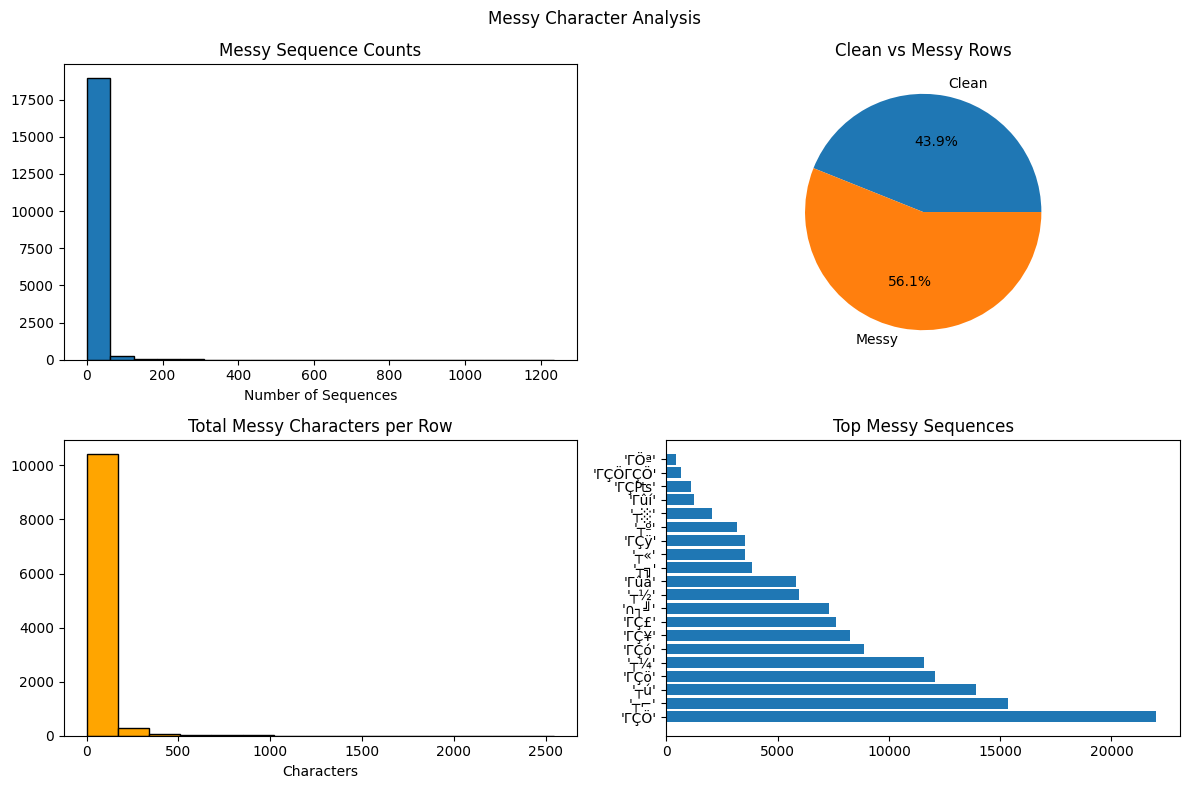

In [7]:
# Create visualizations
if messy_rows > 0:
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Messy Character Analysis')
    
    # Distribution of messy counts
    axes[0,0].hist(df['messy_count'], bins=20, edgecolor='black')
    axes[0,0].set_title('Messy Sequence Counts')
    axes[0,0].set_xlabel('Number of Sequences')
    
    # Clean vs messy pie chart
    clean_count = (~df['has_messy']).sum()
    axes[0,1].pie([clean_count, messy_rows], labels=['Clean', 'Messy'], autopct='%1.1f%%')
    axes[0,1].set_title('Clean vs Messy Rows')
    
    # Total messy characters
    messy_data = df[df['has_messy']]['total_messy_chars']
    axes[1,0].hist(messy_data, bins=15, edgecolor='black', color='orange')
    axes[1,0].set_title('Total Messy Characters per Row')
    axes[1,0].set_xlabel('Characters')
    
    # Top sequences bar chart
    if len(all_sequences) > 0:
        top_10 = sequence_counts.most_common(20)
        seqs, counts = zip(*top_10)
        seqs = [repr(s)[:15] for s in seqs]  # Truncate for display
        
        axes[1,1].barh(range(len(seqs)), counts)
        axes[1,1].set_yticks(range(len(seqs)))
        axes[1,1].set_yticklabels(seqs)
        axes[1,1].set_title('Top Messy Sequences')
    
    plt.tight_layout()
    plt.show()


In [ ]:
# Save results (overrides original, critical/useful new fields)
output_file = file_path
with pd.ExcelWriter(output_file) as writer:
    df.to_excel(writer, sheet_name='Metadata', index=False)
    
    # Summary sheet
    summary = pd.DataFrame({
        'Metric': ['Total Rows', 'Messy Rows', 'Clean Rows', 'Percent Messy'],
        'Value': [total_rows, messy_rows, total_rows-messy_rows, f"{messy_rows/total_rows*100:.1f}%"]
    })
    summary.to_excel(writer, sheet_name='Summary', index=False)

print(f"Results saved to {output_file}")

Results saved to ../../data/changed_data/McCray+.xlsx


In [10]:
# Display final dataframe info
print(f"\nFinal dataframe shape: {df.shape}")
print("New fields added: messy_sequences, messy_count, has_messy, total_messy_chars")


Final dataframe shape: (19329, 39)
New fields added: messy_sequences, messy_count, has_messy, total_messy_chars
